# **INTRO TO STATISTICS**

Hello! In this notebook, we will try to cover the most basic statistical concepts and will do some fun codes to check if it really works.<br>
So, the concepts we will cover here are:<br>

1. *Variables: Input Variables & Output Variables*
2. *Types of Statistical Learning: Descriptive & Inferential*
3. *Population and Sample*
4. *Estimation*
    
Books we will be following:
```
1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An introduction to statistical learning: With applications in Python. Springer.
2. Hastie, T., Tibshirani, R.,, Friedman, J. (2009). The elements of statistical learning: data mining, inference and prediction. Springer.
```

### 1. Variables: Input Variables & Output Variables
In stat, A **_Variable_** is a measurable characteristic, attribute, or feature of a person, object, or event that can take on a variety of values.
<br>
A variable itself may not be meaningful or understandable all the time. For example, say we have a person P's attribute gathered as variable A, B, and C. These variables can be of any datatype or any value. But how does these variables define a person is our concern. A and B could be Height and Weight and we can give a conclusion to that the person P's Height and Weight is A and B. But if C is an unknown variable that contains any positive Real Number from 0 to infinity, what conclusion could we add to that? Without knowing what C means, we can assume everything but cannot define anything.<br>
Turned out, if we divide the Weight with the squared values of Height, it gives us the exact value in C. That's actually the person P's BMI score! But we didn't know that before. Even without knowing what the variable C is, could we have guessed it correctly? Hmm...oh yes! With statistics we actually can guess it!! Actually we call it *_Estimate_* rather than just a random guess.
<br>
To **_Estimate_** the BMI (variable C), we needed the Weight (variable A) and Height (variable B). Then we needed the equation or the estimator function  ```{Weight / Height^2}``` to estimate BMI (variable C). So in this context:
- A and B are **_Input Variables_**: Which works as an input for the estimation function
- C is the **_Output Variable_**: Which works as an output of the estimation function

We can write:
$$BMI (C) = f(Weight(A), Height(B))$$
or simply,
$$Y = f(X)$$
Where, Y is the output of the estimate function of input X.

### 2.Types of Statistical Learning: Descriptive & Inferential
Let's begin with an example of two university students, name Donny and Darcy. We have collected their last semester's grades for the same courses they have taken, number of classes they have attended, and the part-time job hour they spent each week. If I ask who did better in the course, or who was the busiest among them in the last semester, we can easily find out by looking at their grades and their time spent in the semester. Even if I ask what was the average grade or minimum work-time of them, we can answer that by doing some calculations. This means, we can describe or summarize Donny and Darcy's semester by their grades, attendance, and working hour. Therefore, **Descriptive Statistics** is a statistical process that can describe or summarize the data in a meaningful way which can be characterized.
<br>
However, if we were to determine who is a good student among Donny and Darcy from the given dataset, that would be a different case. Because, we cannot judge or conclude a student is good or bad just focusing on grades, attendance, and working time. It requires more logical data and evidence to deduce into such conclusion that we can be confident of what we say. Thus, **Inferential Statistics** is a statistical process that can take a sample from the data to deduce into logical conclusion which can be generalized.
<br>

| Type | Purpose | Context | Statistical Tools |
|---|---|---|---|
| **Descriptive Statistic** | Summarize observed data | Average grades, working ratio, etc. | Mean, Median, Mode, Standard Deviation, etc. |
| **Inferential Statistic** | Make predictions or comparisons | Future grades, performance comparison etc. | Hypothesis testing, Regression, etc. |

#### Let's take the context of Donny and Darcy into a fun code to understand a bit more about basic statistical tools.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Generate Numpy arrays of each column

# Grade Column
grade = np.array([3.25, 3.81, 3.05, 3.92, 2.86,
                  2.75, 2.99, 3.35, 3.95, 3.99,
                  4.0, 4.0, 3.89, 3.82, 3.67])
# Attendance Column
class_num = np.array([40, 46, 38, 48, 33,
                     32, 39, 41, 47, 46,
                     48, 48, 48, 46, 45])
# Worktime Column
work = np.array([290, 280, 300, 260, 318,
                300, 296, 290, 290, 200,
                190, 300, 100, 260, 280])
# Check shapes
if grade.shape == class_num.shape == work.shape:
    print(f"All are same shape: {grade.shape}")

All are same shape: (15,)


In [3]:
data_table = np.array([grade, class_num, work]).T # Transpose for dataframing
data_table

array([[  3.25,  40.  , 290.  ],
       [  3.81,  46.  , 280.  ],
       [  3.05,  38.  , 300.  ],
       [  3.92,  48.  , 260.  ],
       [  2.86,  33.  , 318.  ],
       [  2.75,  32.  , 300.  ],
       [  2.99,  39.  , 296.  ],
       [  3.35,  41.  , 290.  ],
       [  3.95,  47.  , 290.  ],
       [  3.99,  46.  , 200.  ],
       [  4.  ,  48.  , 190.  ],
       [  4.  ,  48.  , 300.  ],
       [  3.89,  48.  , 100.  ],
       [  3.82,  46.  , 260.  ],
       [  3.67,  45.  , 280.  ]])

In [4]:
data_table.shape

(15, 3)

In [5]:
data = pd.DataFrame(data_table, index=range(1, len(grade)+1),
                    columns=("Grade(/4.00)", "Attendance(/48H)", "Worktime(/320H)"),
                    dtype="float32")
data

,Grade(/4.00),Attendance(/48H),Worktime(/320H)
1,3.25,40.0,290.0
2,3.81,46.0,280.0
3,3.05,38.0,300.0
4,3.92,48.0,260.0
5,2.86,33.0,318.0
6,2.75,32.0,300.0
7,2.99,39.0,296.0
8,3.35,41.0,290.0
9,3.95,47.0,290.0
10,3.99,46.0,200.0


Let's do some fun statistical calculations and visualization!
<br>
We can use Pandas defined methods for descriptive statistics.

In [6]:
# Print Mean, Mode, and Median
avg_grade = data["Grade(/4.00)"].mean()
mode_att = data["Attendance(/48H)"].mode()
med_work = data["Worktime(/320H)"].median()

print(f"Mean of Grade Points\t: {avg_grade}\nMode of Attendance\t: {mode_att}\nMedian of Worktime\t: {med_work}")

Mean of Grade Points	: 3.5533335208892822
Mode of Attendance	: 0    48.0
dtype: float32
Median of Worktime	: 290.0


Or, we could just call the `describe()` method to get all the basic descriptive stats

In [7]:
data.describe()

,Grade(/4.00),Attendance(/48H),Worktime(/320H)
count,15.000000,15.000000,15.000000
mean,3.553334,43.000000,263.600006
std,0.461019,5.490251,57.857956
min,2.750000,32.000000,100.000000
25%,3.150000,39.500000,260.000000
50%,3.810000,46.000000,290.000000
75%,3.935000,47.500000,298.000000
max,4.000000,48.000000,318.000000


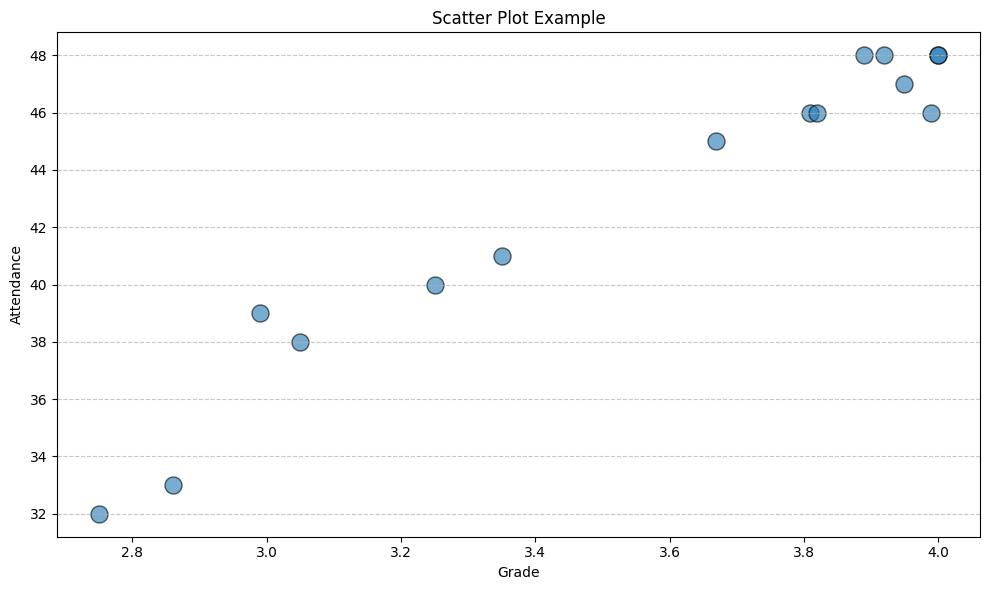

In [8]:
# Create the dot plot
plt.figure(figsize=(10, 6))
plt.scatter(data["Grade(/4.00)"], data["Attendance(/48H)"], 
            s=150, alpha=0.6, edgecolors='black')
# Customize the plot
plt.title('Scatter Plot Example')
plt.xlabel('Grade')
plt.ylabel('Attendance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

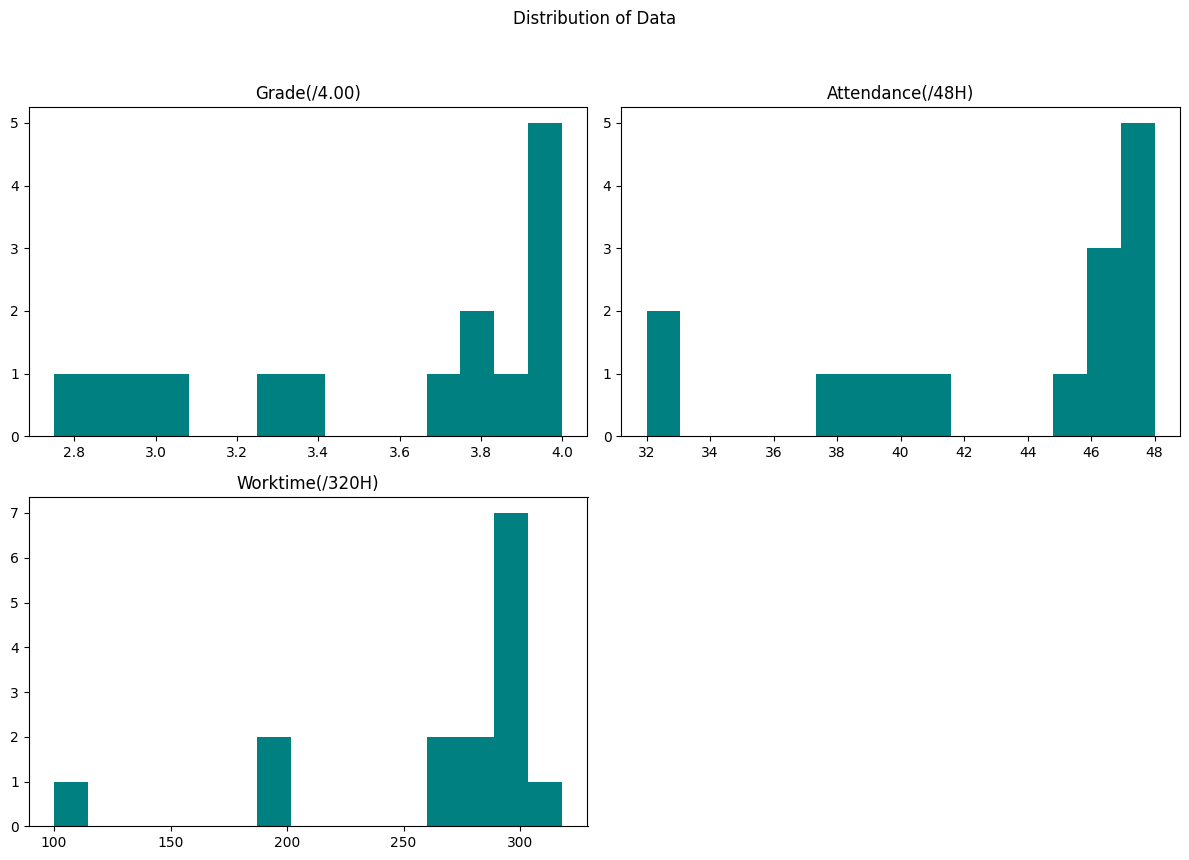

In [9]:
data.hist(bins=15, figsize=(12, 9), grid=False, color="teal")
plt.suptitle('Distribution of Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()